In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib inline

# 1d case

In [3]:
fs = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6)[::1]:
    fs.append(h5py.File(f'3d\\data_1em2_serial{n}.hdf5', 'r'))

In [4]:
fs

[<HDF5 file "data_1em2_serial0.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial1.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial2.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial3.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial4.hdf5" (mode r)>,
 <HDF5 file "data_1em2_serial5.hdf5" (mode r)>]

In [5]:
fs[0]['Domain/x'].shape
print(fs[0]['Primitive'])

<HDF5 group "/Primitive" (16 members)>


In [6]:
fs[0]['Primitive/pi11'].shape

(50, 4, 4)

In [7]:
fs[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [8]:
fs[0]['Optional'].attrs.keys()

<KeysViewHDF5 ['eta', 'kappa', 'nOptionalSimArgs', 'tau_Pi', 'tau_pi', 'tau_q', 'zeta']>

In [9]:
eta = fs[0]['Optional'].attrs['eta'][0]
tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.0, relaxation time 0.2, timestep 0.0011547005383792516


In [10]:
fs[-1].attrs['t']

array([0.4])

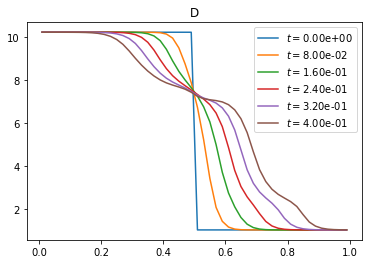

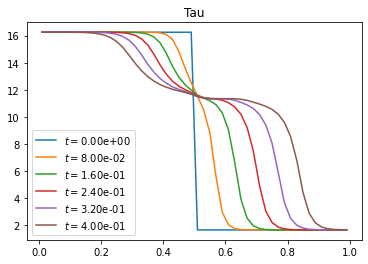

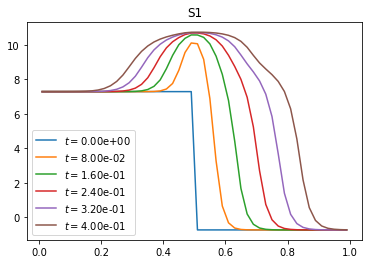

In [11]:
nslice=fs[0]['Domain'].attrs['ny'][0]//2
for quant in['D','Tau','S1']:
    plt.figure()
    for f in fs:
        plt.plot(f['Domain/x'], f['Conserved/'+quant][:, nslice, nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("Cons_"+quant+".pdf")
    plt.show()


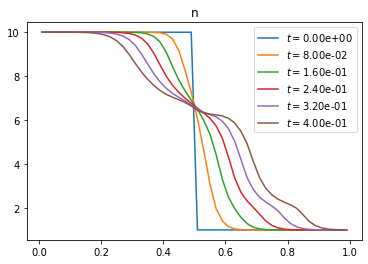

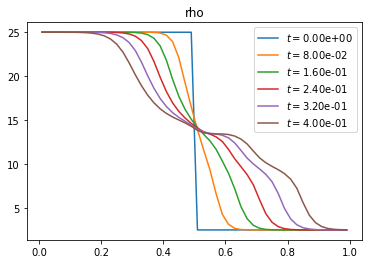

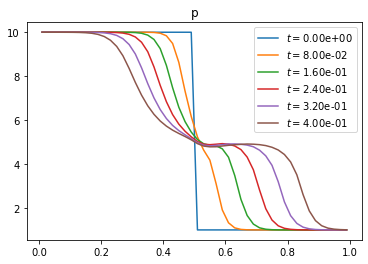

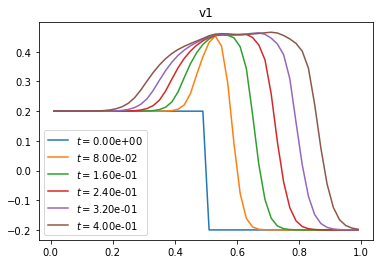

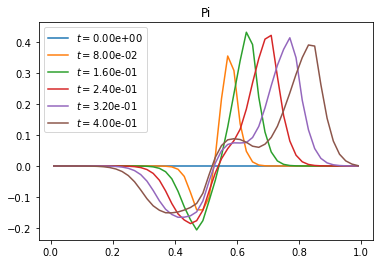

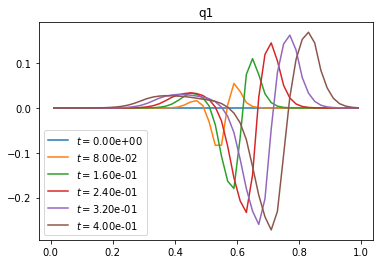

In [12]:
for quant in['n','rho','p','v1','Pi','q1']:
    plt.figure()
    for f in fs:
        plt.plot(f['Domain/x'], f['Primitive/'+quant][:, nslice, nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("Prims_"+quant+".pdf")
    plt.show()
    

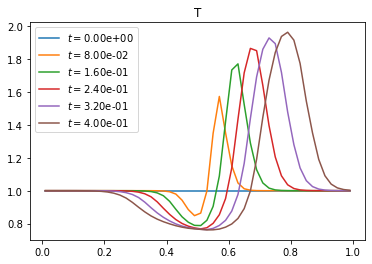

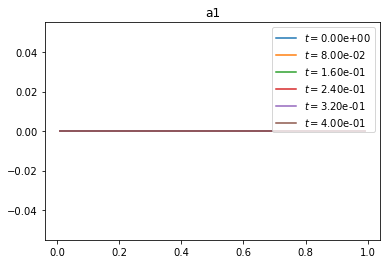

In [13]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs:
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:, nslice, nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("Aux_"+quant+".pdf")
    plt.show()
